In [79]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt

In [80]:
# load dataset
data=pd.read_csv("C:/Users/admin/ML_Project/US_Health_Insureance_Prediction/insurance.csv")

In [81]:
#Display Top 5 Rows of The Dataset
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [82]:
# Find Shape of Our Dataset (Number of Rows And Number of Columns)
data.shape

(1338, 7)

In [83]:
# Get Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [84]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [85]:
#Check Null Values In The Dataset
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [86]:
# Covert Columns From String ['sex' ,'smoker','region' ] To Numerical Values
data['sex'].unique()

array(['female', 'male'], dtype=object)

In [87]:
data['sex']=data['sex'].map({'female':0,'male':1})

In [88]:
data['smoker']=data['smoker'].map({'yes':1,'no':0})

In [89]:
data['region']=data['region'].map({'southwest':1,'southeast':2,
                   'northwest':3,'northeast':4})

In [90]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520


In [91]:
# Store feature matrix in X and Respose (target) in vector(y)

In [92]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [93]:
X = data.drop(['charges'],axis=1)
y = data['charges']

In [94]:
# train-test split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)

In [95]:
# import the models
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [96]:
# Model Training
lr = LinearRegression()
lr.fit(X_train,y_train)
svm = SVR()
svm.fit(X_train,y_train)
rm = RandomForestRegressor()
rm.fit(X_train,y_train)
gnb = GradientBoostingRegressor()
gnb.fit(X_train,y_train)

GradientBoostingRegressor()

In [97]:
# Prediction on Test Data
y_pred1 = lr.predict(X_test)
y_pred2 = svm.predict(X_test)
y_pred3 = rm.predict(X_test)
y_pred4 = gnb.predict(X_test)

df1 = pd.DataFrame({'Actual': y_test,'LR': y_pred1,'SVM': y_pred2,'RM': y_pred3,'GNB': y_pred4})

In [98]:
df1

,Actual,LR,SVM,RM,GNB
764,9095.06825,8924.407244,9548.261584,10975.569297,11001.128629
887,5272.17580,7116.295018,9492.515425,5561.130441,5840.174656
890,29330.98315,36909.013521,9648.758701,28381.285563,28001.980112
1293,9301.89355,9507.874691,9555.044136,9441.882560,9745.291602
259,33750.29180,27013.350008,9420.421978,34565.242174,33639.100981
...,...,...,...,...,...
109,47055.53210,39116.968669,9648.902852,47258.012114,45431.423211
575,12222.89830,11814.555568,9625.431547,12700.181239,12465.025294
535,6067.12675,7638.107736,9504.168517,6455.583686,6974.336525
543,63770.42801,40959.081722,9605.004594,46736.316252,47862.047791


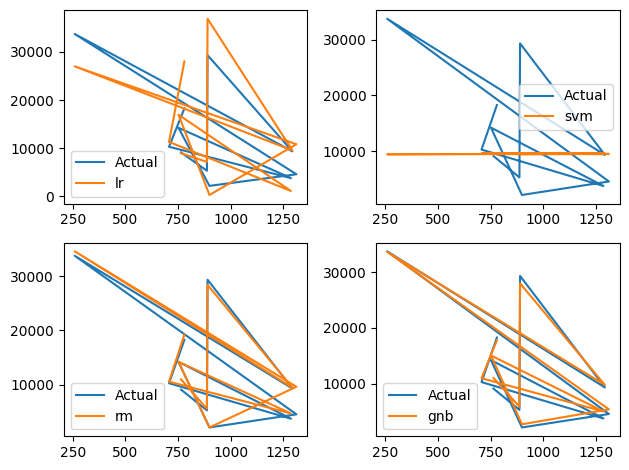

In [109]:
# Compare Performance Visually

plt.subplot(221)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['LR'].iloc[0:11],label="lr")
plt.legend()

plt.subplot(222)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['SVM'].iloc[0:11],label='svm')
plt.legend()

plt.subplot(223)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['RM'].iloc[0:11],label='rm')
plt.legend()

plt.subplot(224)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['GNB'].iloc[0:11],label='gnb')
plt.legend()

plt.tight_layout()


In [115]:
# Evaluate the model

from sklearn import metrics

score1 = metrics.r2_score(y_test,pred1)
score2 = metrics.r2_score(y_test,pred2)
score3 = metrics.r2_score(y_test,pred3)
score4 = metrics.r2_score(y_test,pred4)

In [116]:
print(score1,score2,score3,score4)

0.7833463107364539 -0.07229762787861826 0.8686875279408648 0.8779726251291786


In [123]:
s1 = metrics.mean_absolute_error(y_test,y_pred1)
s2 = metrics.mean_absolute_error(y_test,y_pred2)
s3 = metrics.mean_absolute_error(y_test,y_pred3)
s4 = metrics.mean_absolute_error(y_test,y_pred4)

In [124]:
print(s1,s2,s3,s4)

4186.508898366434 8592.428727899724 2466.507648827924 2447.9515580545844
